In [219]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score,silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
customers = pd.read_csv(r"E:\Datasets\Zeotap Task\Customers.csv")
customers['SignupDate'] = pd.to_datetime(cust['SignupDate'])
products = pd.read_csv(r"E:\Datasets\Zeotap Task\Products.csv")
transactions = pd.read_csv(r"E:\Datasets\Zeotap Task\Transactions.csv")
transactions['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])

merged_data = trans.merge(cust, on='CustomerID').merge(prod.drop('Price',axis=1), on='ProductID')

In [45]:
last_date = transactions['TransactionDate'].max()
customers['Tenure'] = (last_date - customers['SignupDate']).dt.days

In [46]:
transaction_agg = transactions.groupby('CustomerID').agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalQuantity=('Quantity', 'sum'),
    TotalSpent=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    LastPurchaseDate=('TransactionDate', 'max'),
    UniqueProducts=('ProductID', 'nunique')
).reset_index()

In [47]:
transaction_agg

,CustomerID,TotalTransactions,TotalQuantity,TotalSpent,AvgTransactionValue,LastPurchaseDate,UniqueProducts
0,C0001,5,12,3354.52,670.904000,2024-11-02 17:04:16,5
1,C0002,4,10,1862.74,465.685000,2024-12-03 01:41:41,4
2,C0003,4,14,2725.38,681.345000,2024-08-24 18:54:04,4
3,C0004,8,23,5354.88,669.360000,2024-12-23 14:13:52,8
4,C0005,3,7,2034.24,678.080000,2024-11-04 00:30:22,3
...,...,...,...,...,...,...,...
194,C0196,4,12,4982.88,1245.720000,2024-12-15 03:43:35,3
195,C0197,3,9,1928.65,642.883333,2024-12-27 18:20:31,3
196,C0198,2,3,931.83,465.915000,2024-10-04 18:31:12,2
197,C0199,4,9,1979.28,494.820000,2024-10-26 00:01:58,4


In [48]:
transaction_agg['Recency'] = (last_date - pd.to_datetime(transaction_agg['LastPurchaseDate'])).dt.days

In [49]:
transaction_agg.drop('LastPurchaseDate', axis=1, inplace=True)

In [50]:
transaction_agg

,CustomerID,TotalTransactions,TotalQuantity,TotalSpent,AvgTransactionValue,UniqueProducts,Recency
0,C0001,5,12,3354.52,670.904000,5,55
1,C0002,4,10,1862.74,465.685000,4,25
2,C0003,4,14,2725.38,681.345000,4,125
3,C0004,8,23,5354.88,669.360000,8,4
4,C0005,3,7,2034.24,678.080000,3,54
...,...,...,...,...,...,...,...
194,C0196,4,12,4982.88,1245.720000,3,13
195,C0197,3,9,1928.65,642.883333,3,0
196,C0198,2,3,931.83,465.915000,2,84
197,C0199,4,9,1979.28,494.820000,4,63


In [51]:
transactions_with_cat = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID', how='left')
category_counts = pd.crosstab(transactions_with_cat['CustomerID'], transactions_with_cat['Category'])

In [52]:
category_counts

Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,1,0,3,1
C0002,0,2,0,2
C0003,0,1,1,2
C0004,3,0,2,3
C0005,0,0,2,1
...,...,...,...,...
C0196,1,1,0,2
C0197,0,0,2,1
C0198,0,1,1,0


In [53]:
transaction_agg = transaction_agg.merge(category_counts, on='CustomerID', how='left')

In [54]:
transaction_agg

,CustomerID,TotalTransactions,TotalQuantity,TotalSpent,AvgTransactionValue,UniqueProducts,Recency,Books,Clothing,Electronics,Home Decor
0,C0001,5,12,3354.52,670.904000,5,55,1,0,3,1
1,C0002,4,10,1862.74,465.685000,4,25,0,2,0,2
2,C0003,4,14,2725.38,681.345000,4,125,0,1,1,2
3,C0004,8,23,5354.88,669.360000,8,4,3,0,2,3
4,C0005,3,7,2034.24,678.080000,3,54,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
194,C0196,4,12,4982.88,1245.720000,3,13,1,1,0,2
195,C0197,3,9,1928.65,642.883333,3,0,0,0,2,1
196,C0198,2,3,931.83,465.915000,2,84,0,1,1,0
197,C0199,4,9,1979.28,494.820000,4,63,0,0,2,2


In [55]:
customers_processed = customers.merge(transaction_agg, on='CustomerID', how='left')
customers_processed

,CustomerID,CustomerName,Region,SignupDate,Tenure,TotalTransactions,TotalQuantity,TotalSpent,AvgTransactionValue,UniqueProducts,Recency,Books,Clothing,Electronics,Home Decor
0,C0001,Lawrence Carroll,South America,2022-07-10,902,5.0,12.0,3354.52,670.904000,5.0,55.0,1.0,0.0,3.0,1.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1049,4.0,10.0,1862.74,465.685000,4.0,25.0,0.0,2.0,0.0,2.0
2,C0003,Michael Rivera,South America,2024-03-07,296,4.0,14.0,2725.38,681.345000,4.0,125.0,0.0,1.0,1.0,2.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,811,8.0,23.0,5354.88,669.360000,8.0,4.0,3.0,0.0,2.0,3.0
4,C0005,Laura Weber,Asia,2022-08-15,866,3.0,7.0,2034.24,678.080000,3.0,54.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,935,4.0,12.0,4982.88,1245.720000,3.0,13.0,1.0,1.0,0.0,2.0
196,C0197,Christina Harvey,Europe,2023-03-21,648,3.0,9.0,1928.65,642.883333,3.0,0.0,0.0,0.0,2.0,1.0
197,C0198,Rebecca Ray,Europe,2022-02-27,1035,2.0,3.0,931.83,465.915000,2.0,84.0,0.0,1.0,1.0,0.0
198,C0199,Andrea Jenkins,Europe,2022-12-03,756,4.0,9.0,1979.28,494.820000,4.0,63.0,0.0,0.0,2.0,2.0


In [57]:
customers_processed.fillna(0, inplace=True)
customers_processed.drop(['CustomerName', 'SignupDate'], axis=1, inplace=True)

In [58]:
customers_processed

,CustomerID,Region,Tenure,TotalTransactions,TotalQuantity,TotalSpent,AvgTransactionValue,UniqueProducts,Recency,Books,Clothing,Electronics,Home Decor
0,C0001,South America,902,5.0,12.0,3354.52,670.904000,5.0,55.0,1.0,0.0,3.0,1.0
1,C0002,Asia,1049,4.0,10.0,1862.74,465.685000,4.0,25.0,0.0,2.0,0.0,2.0
2,C0003,South America,296,4.0,14.0,2725.38,681.345000,4.0,125.0,0.0,1.0,1.0,2.0
3,C0004,South America,811,8.0,23.0,5354.88,669.360000,8.0,4.0,3.0,0.0,2.0,3.0
4,C0005,Asia,866,3.0,7.0,2034.24,678.080000,3.0,54.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,Europe,935,4.0,12.0,4982.88,1245.720000,3.0,13.0,1.0,1.0,0.0,2.0
196,C0197,Europe,648,3.0,9.0,1928.65,642.883333,3.0,0.0,0.0,0.0,2.0,1.0
197,C0198,Europe,1035,2.0,3.0,931.83,465.915000,2.0,84.0,0.0,1.0,1.0,0.0
198,C0199,Europe,756,4.0,9.0,1979.28,494.820000,4.0,63.0,0.0,0.0,2.0,2.0


In [63]:
customers_processed = pd.get_dummies(customers_processed, columns=['Region'])

In [64]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers_processed.drop('CustomerID', axis=1))

In [65]:
scaled_features

array([[ 1.15288412,  0.        , -0.1107351 , ..., -0.57735027,
        -0.54653573,  1.54590766],
       [ 1.60559336, -0.45129368, -0.43404927, ..., -0.57735027,
        -0.54653573, -0.64686916],
       [-0.7133866 , -0.45129368,  0.21257907, ..., -0.57735027,
        -0.54653573,  1.54590766],
       ...,
       [ 1.56247819, -1.35388105, -1.56564887, ...,  1.73205081,
        -0.54653573, -0.64686916],
       [ 0.70325454, -0.45129368, -0.59570636, ...,  1.73205081,
        -0.54653573, -0.64686916],
       [ 0.11812015,  0.        ,  0.53589324, ..., -0.57735027,
        -0.54653573, -0.64686916]])

# 1. KMeans Clustering

In [220]:
db_scores_kmeans = []
silhouette_kmeans = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = kmeans.fit_predict(scaled_features)
    db_scores_kmeans.append(davies_bouldin_score(scaled_features, clusters_kmeans))
    silhouette_kmeans.append(silhouette_score(scaled_features, clusters_kmeans))
best_k = np.argmin(db_scores_kmeans) + 2  

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [224]:
print(db_scores_kmeans)
print(silhouette_kmeans)

[1.9075810744636252, 2.1612945377785735, 2.0228098564292085, 1.8439113239168716, 1.8186331232977047, 1.8630569490896753, 1.6543116599960568, 1.6308250998512885, 1.662309476842518]
[0.17354764532576916, 0.1204413060721612, 0.13666917944746212, 0.1574020857114675, 0.13889871740932339, 0.11614518812247715, 0.17740461699164334, 0.17708980227363127, 0.17259540449924024]


In [198]:
best_k

9

In [199]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



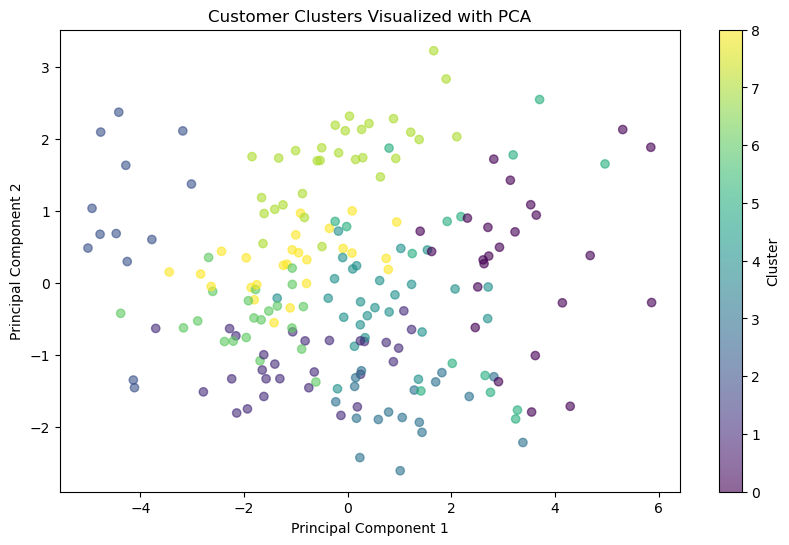

In [200]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Customer Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

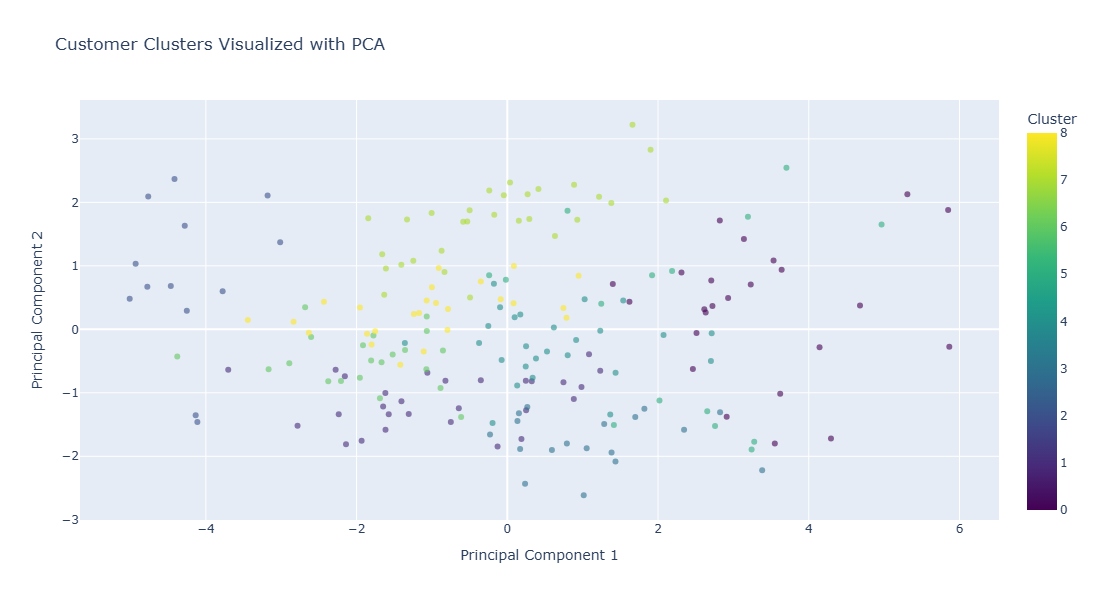

In [201]:
# Create interactive scatter plot
fig = px.scatter(principal_components, 
                 x=principal_components[:, 0], 
                 y=principal_components[:, 1], 
                 color=clusters,
                 color_continuous_scale='viridis',
                 opacity=0.6,
                 title='Customer Clusters Visualized with PCA',
                 width=1000,
                 height=600)

# Update layout and axis labels
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    coloraxis_colorbar=dict(title='Cluster')
)

fig.show()


In [202]:
db_index = davies_bouldin_score(scaled_features, clusters)

In [203]:
db_index

1.6308250998512885

# 2. DBSCAN

In [226]:
dbscan = DBSCAN(eps=3, min_samples=3) 
clusters_dbscan = dbscan.fit_predict(scaled_features)

In [227]:
if len(np.unique(clusters_dbscan)) > 1:
    db_index_dbscan = davies_bouldin_score(scaled_features, clusters_dbscan)
else:
    db_index_dbscan = "Not computable because only 1 cluster"

print(f"DBSCAN Clusters: {np.unique(clusters_dbscan)}")
print(f"DB Index (DBSCAN): {db_index_dbscan}")

DBSCAN Clusters: [-1  0  1  2  3]
DB Index (DBSCAN): 3.256663285554437


In [228]:
silhouette_score(scaled_features, clusters_dbscan)

0.1771258029257783

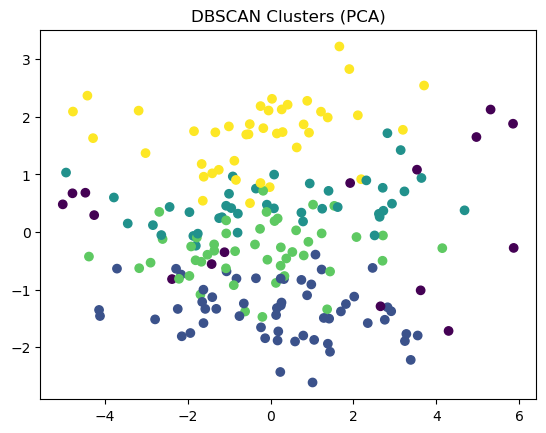

In [129]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('DBSCAN Clusters (PCA)')
plt.show()

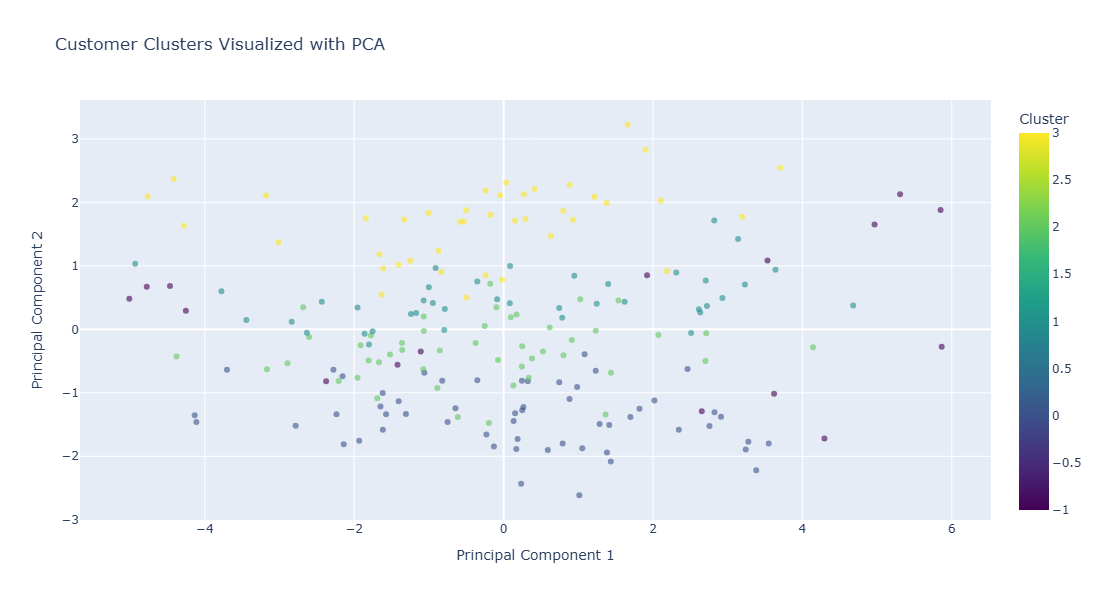

In [130]:
# Create interactive scatter plot
fig = px.scatter(principal_components, 
                 x=principal_components[:, 0], 
                 y=principal_components[:, 1], 
                 color=clusters_dbscan,
                 color_continuous_scale='viridis',
                 opacity=0.6,
                 title='Customer Clusters Visualized with PCA',
                 width=1000,
                 height=600)

# Update layout and axis labels
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    coloraxis_colorbar=dict(title='Cluster')
)

fig.show()


# 3. Agglomerative Hierarchical Clustering

In [229]:
db_scores_agg = []
silhouette_agg = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    clusters_agg = agg.fit_predict(scaled_features)
    db_scores_agg.append(davies_bouldin_score(scaled_features, clusters_agg))
    silhouette_agg.append(silhouette_score(scaled_features, clusters_agg))
    
best_k = np.argmin(db_scores_agg) + 2  

In [230]:
best_k

10

In [231]:
db_scores_agg,silhouette_agg

([1.9372158485044697,
  2.1799515879708546,
  2.072656062455479,
  1.7837138279760896,
  1.7244304236724313,
  1.7604495612329862,
  1.7708259815102632,
  1.6833120881120194,
  1.578105153924958],
 [0.16723634185177072,
  0.11154356436422544,
  0.13452373666350131,
  0.15275194493999822,
  0.15820675605589257,
  0.16839063779693908,
  0.16418828783822248,
  0.17069126716110108,
  0.1772607325580031])

In [232]:
n_clusters = 10  # best_k
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters_agg = agg.fit_predict(scaled_features)

# Metrics
db_index_agg = davies_bouldin_score(scaled_features, clusters_agg)
print(f"Agglomerative Clusters: {np.unique(clusters_agg)}")
print(f"DB Index (Agglomerative): {db_index_agg:.3f}")


Agglomerative Clusters: [0 1 2 3 4 5 6 7 8 9]
DB Index (Agglomerative): 1.578


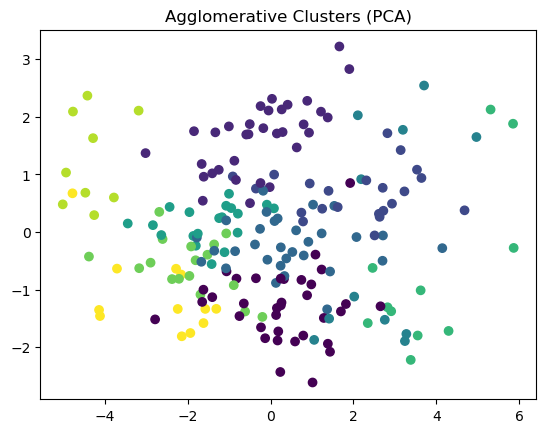

In [233]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_agg, cmap='viridis')
plt.title('Agglomerative Clusters (PCA)')
plt.show()

# 4. Gaussian Mixture Model (GMM)

In [234]:
db_scores_gmm = []
silhouette_gmm = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    clusters_gmm = gmm.fit_predict(scaled_features)
    db_scores_gmm.append(davies_bouldin_score(scaled_features, clusters_gmm))
    silhouette_gmm.append(silhouette_score(scaled_features, clusters_gmm))
best_k = np.argmin(db_scores_gmm) + 2  

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [236]:
db_scores_gmm,silhouette_gmm

([2.2102286957751325,
  2.2350721057386846,
  2.011795050413152,
  1.9360392749653612,
  1.9983188830225977,
  1.8761611461110117,
  2.098263624271904,
  1.6474408055964547,
  1.6864872133939834],
 [0.1475650686783616,
  0.10623997794825321,
  0.10747898892532282,
  0.13171315633755434,
  0.0954313344839111,
  0.15592745496128824,
  0.15373301446627705,
  0.14753628097064145,
  0.15416664266716018])

In [214]:
best_k

9

In [215]:
n_clusters = 9
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters_gmm = gmm.fit_predict(scaled_features)

C:\Users\iamaj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [216]:
db_index_gmm = davies_bouldin_score(scaled_features, clusters_gmm)
print(f"GMM Clusters: {np.unique(clusters_gmm)}")
print(f"DB Index (GMM): {db_index_gmm:.3f}")

GMM Clusters: [0 1 2 3 4 5 6 7 8]
DB Index (GMM): 1.647


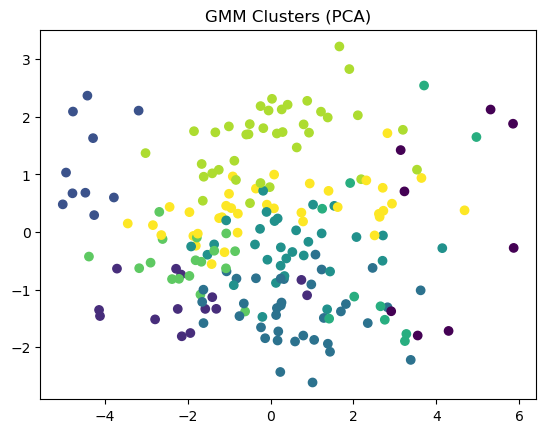

In [217]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_gmm, cmap='viridis')
plt.title('GMM Clusters (PCA)')
plt.show()